<a href="https://colab.research.google.com/github/hemanth714444/2203A52192_DAUP/blob/main/2203A52192_Activity_3_batch_37.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn scipy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


url = "/content/dermatology_database_1.csv"
df = pd.read_csv(url)


df = df.replace('?', np.nan)

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df = df.fillna(df.mean())
X = df.drop("class", axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")




SVM Accuracy: 0.73
Random Forest Accuracy: 0.99


In [3]:
# Q2. Outlier Detection and Removal
z_scores = zscore(X)
outliers = (np.abs(z_scores) > 3)
X_clean = X[(~outliers).all(axis=1)]
y_clean = y[X_clean.index]

# Split cleaned data
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train SVM on cleaned data
svm_model.fit(X_train_clean, y_train_clean)
y_pred_svm_clean = svm_model.predict(X_test_clean)
svm_accuracy_clean = accuracy_score(y_test_clean, y_pred_svm_clean)

# Train Random Forest on cleaned data
rf_model.fit(X_train_clean, y_train_clean)
y_pred_rf_clean = rf_model.predict(X_test_clean)
rf_accuracy_clean = accuracy_score(y_test_clean, y_pred_rf_clean)

print(f"SVM Accuracy (after outlier removal): {svm_accuracy_clean:.2f}")
print(f"Random Forest Accuracy (after outlier removal): {rf_accuracy_clean:.2f}")



SVM Accuracy (after outlier removal): 0.65
Random Forest Accuracy (after outlier removal): 0.94


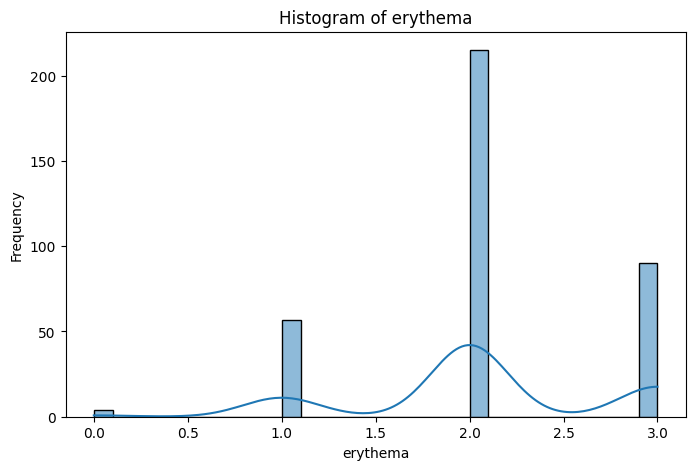

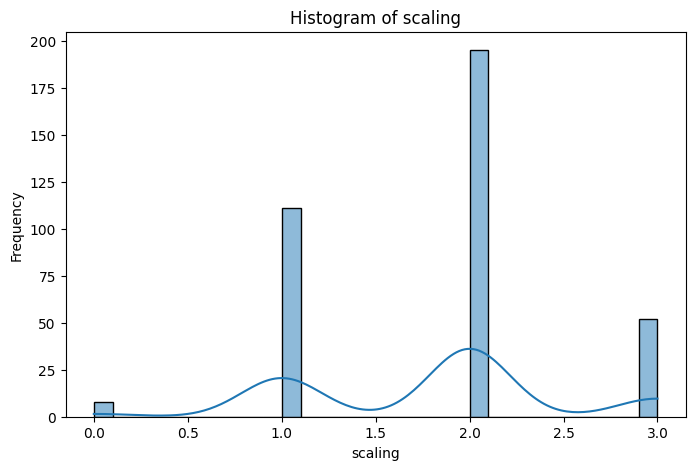

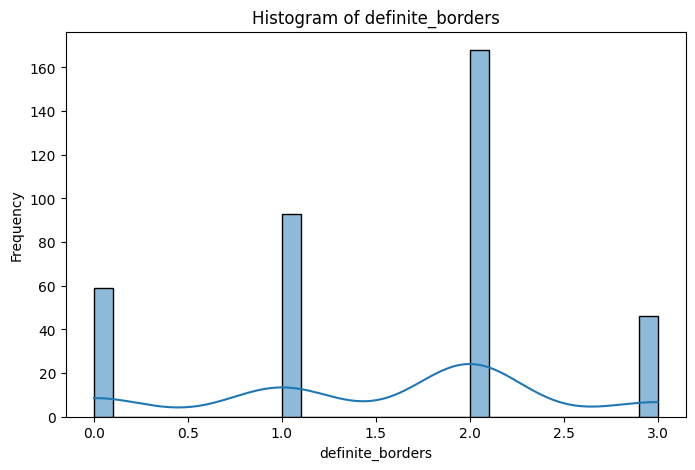

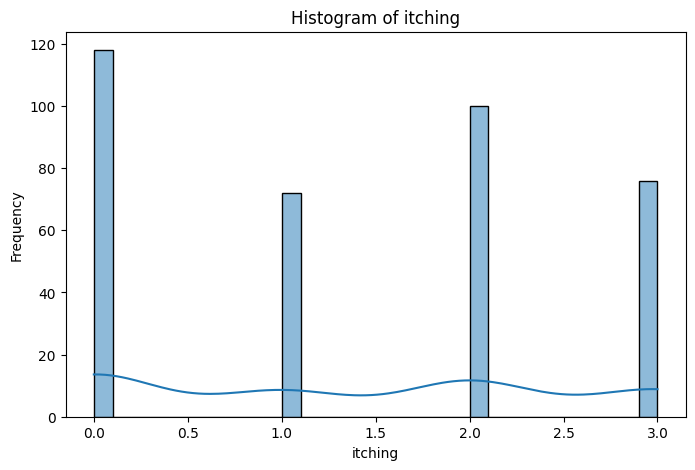

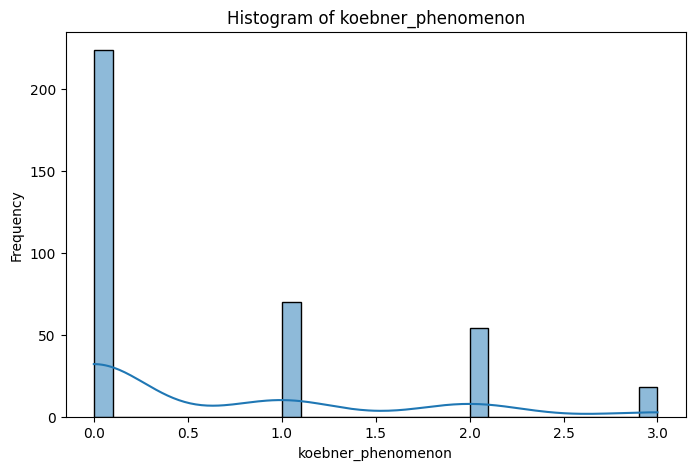

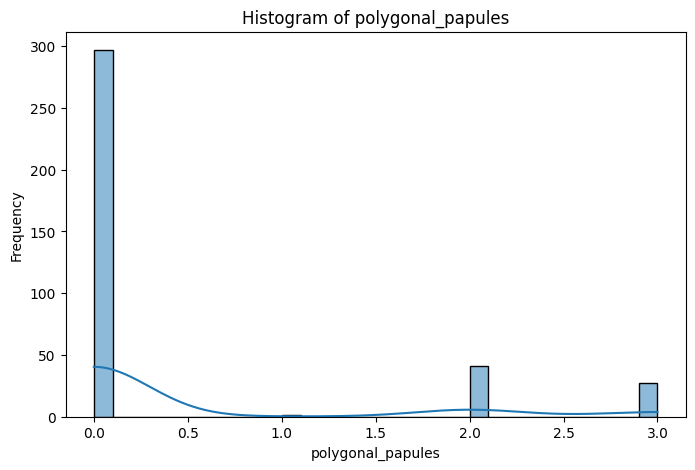

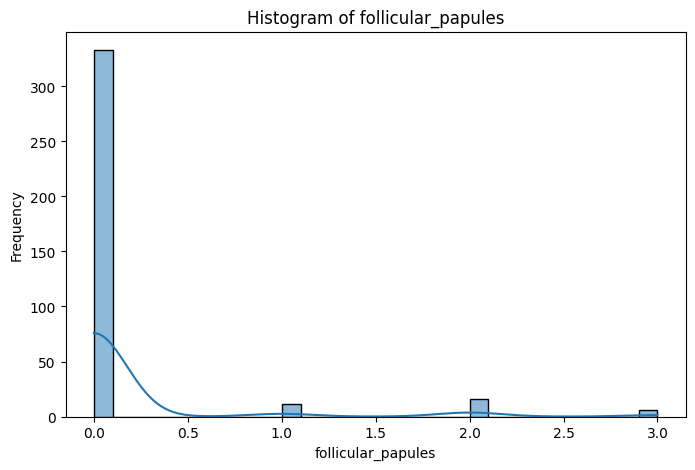

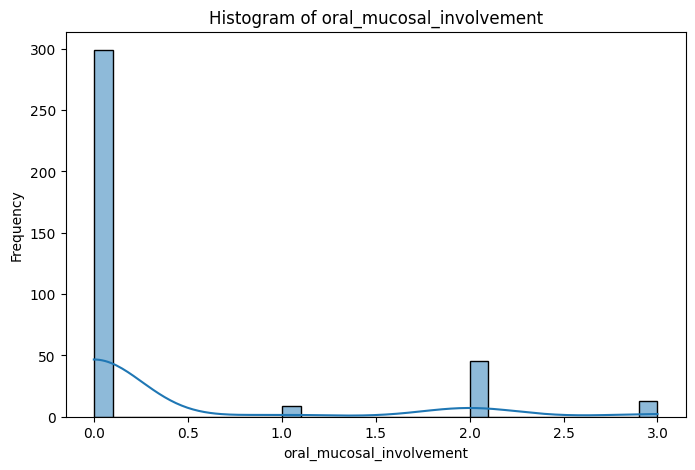

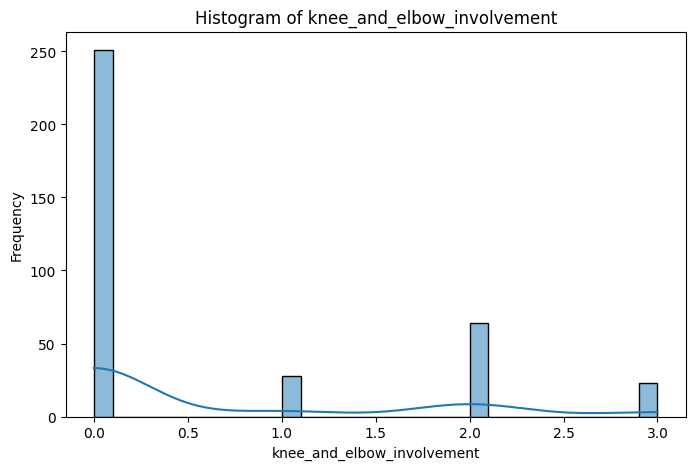

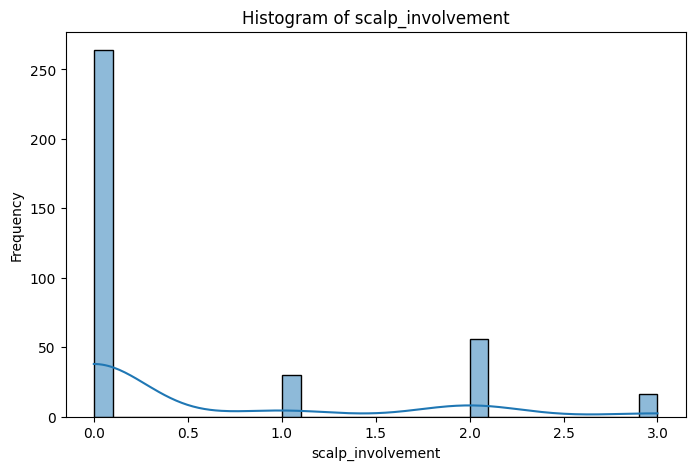

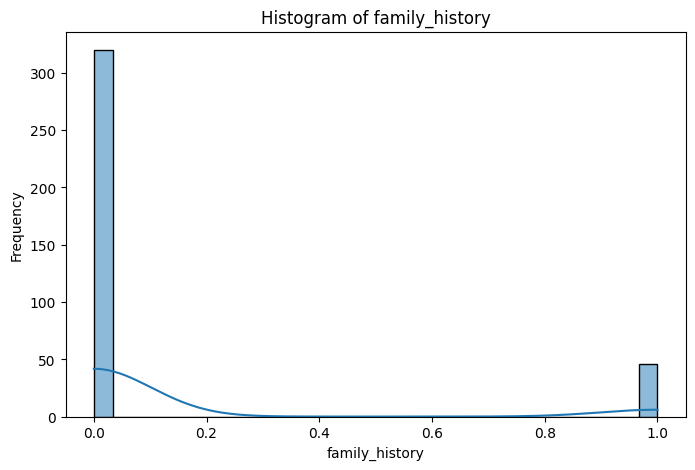

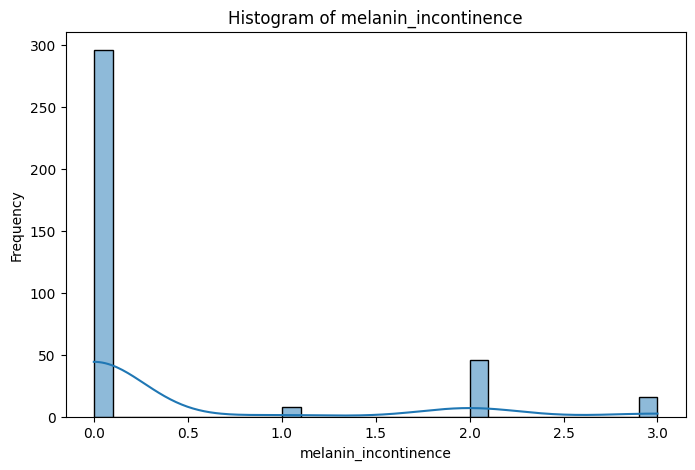

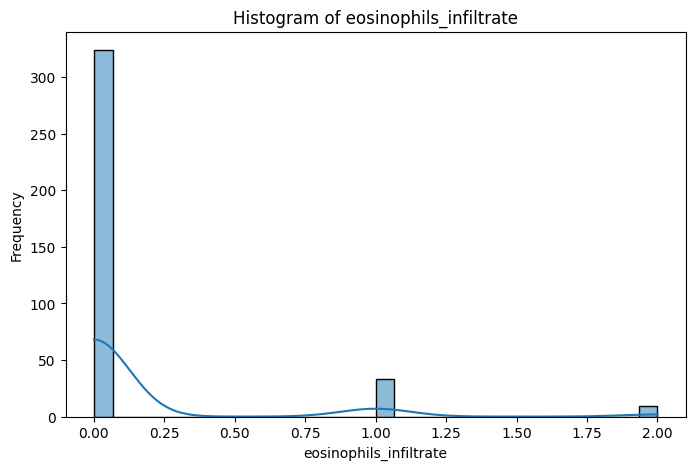

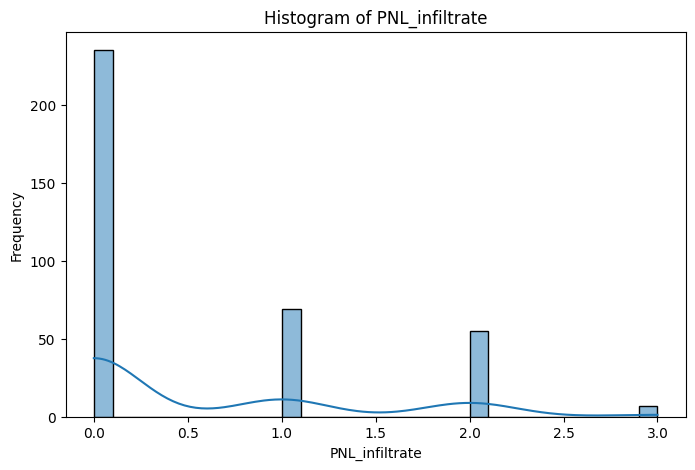

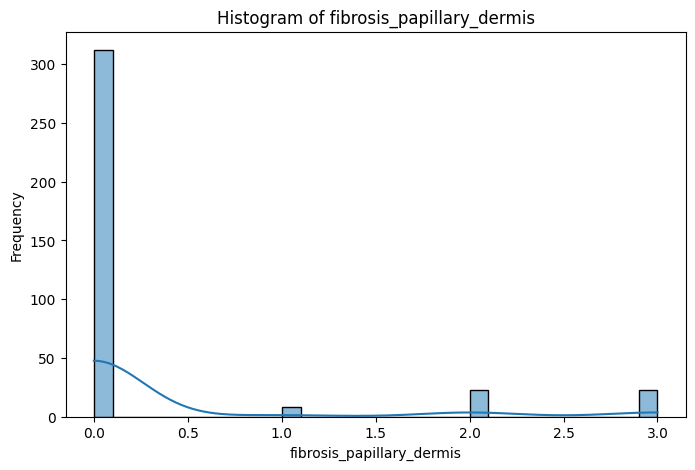

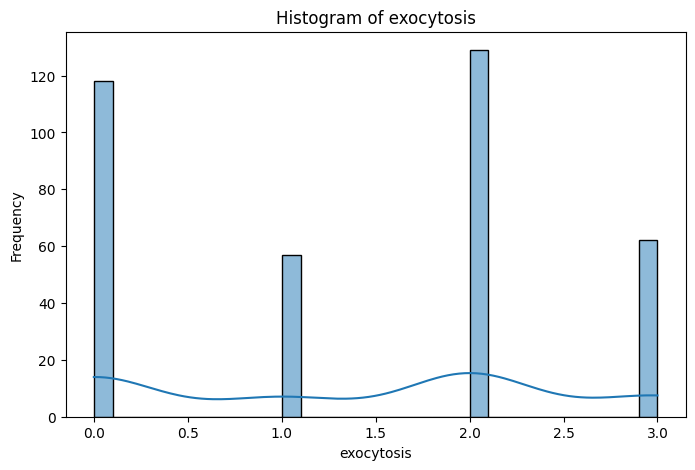

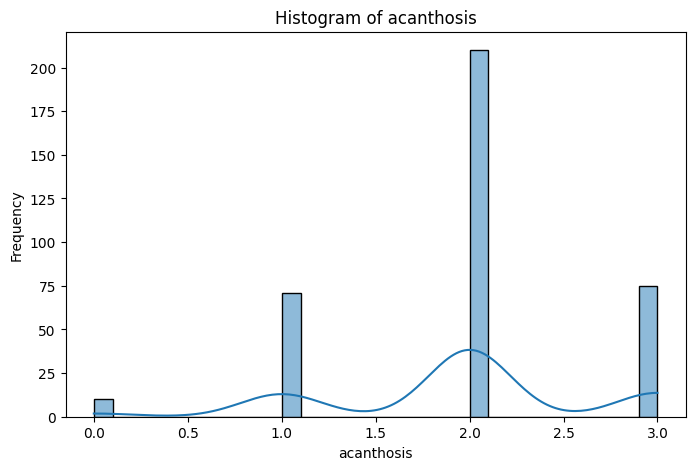

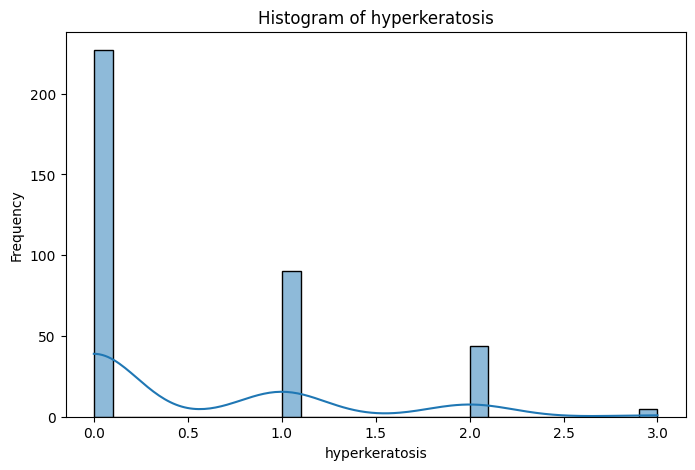

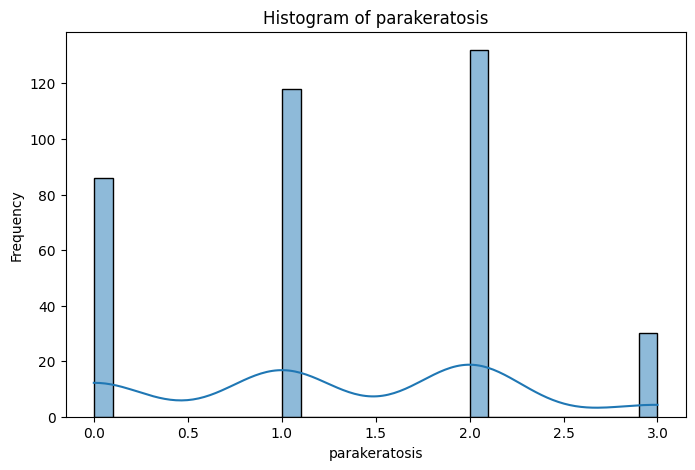

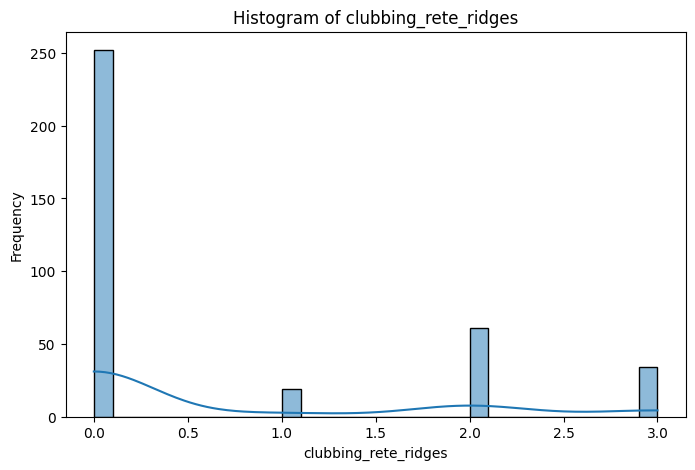

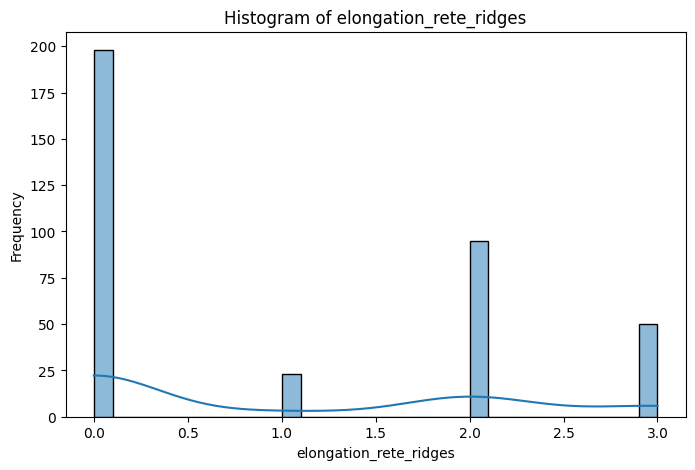

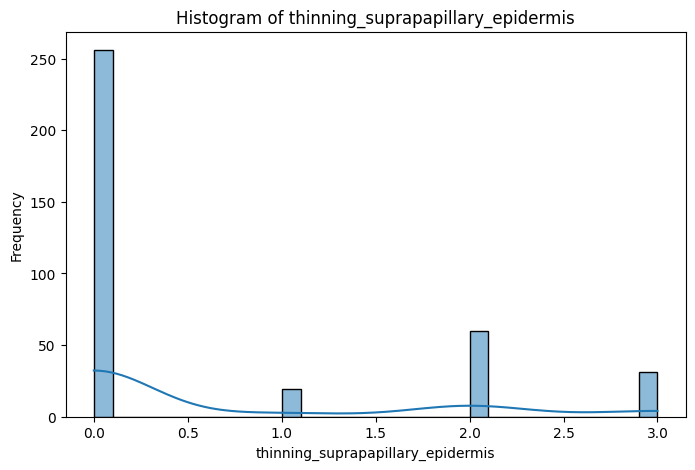

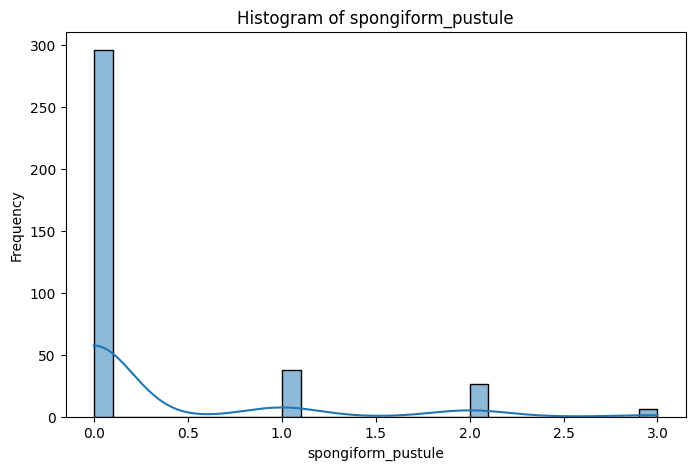

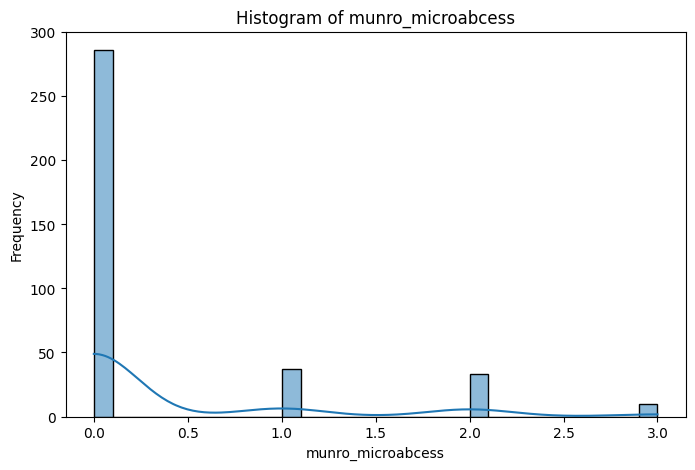

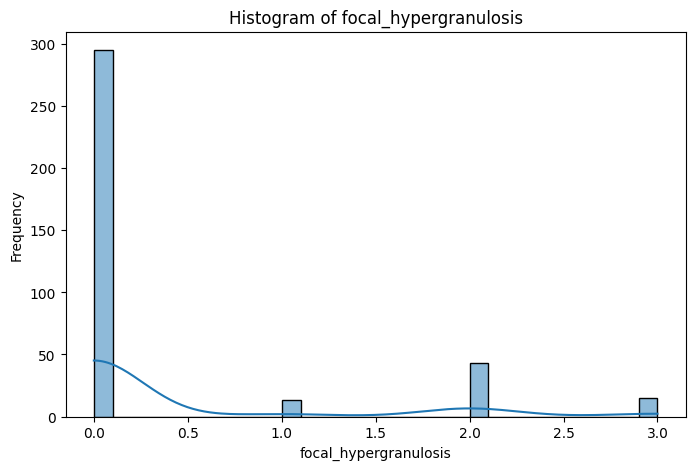

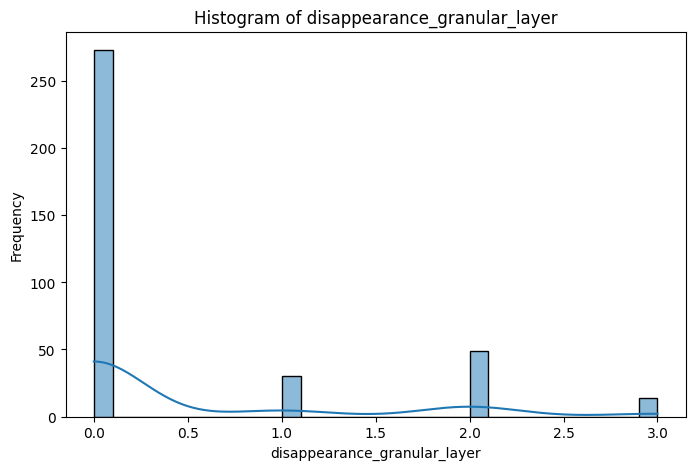

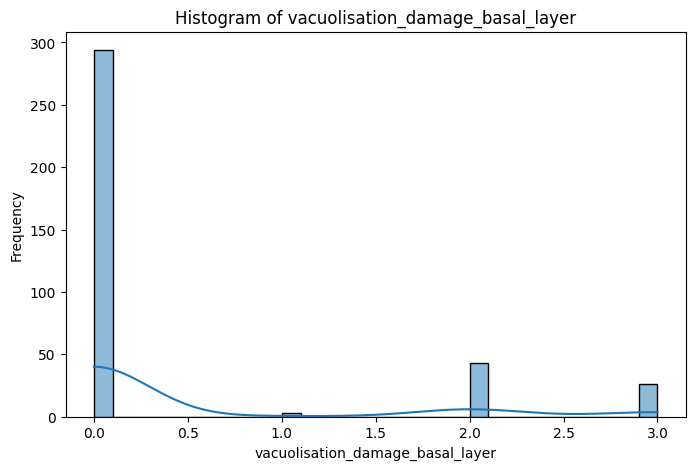

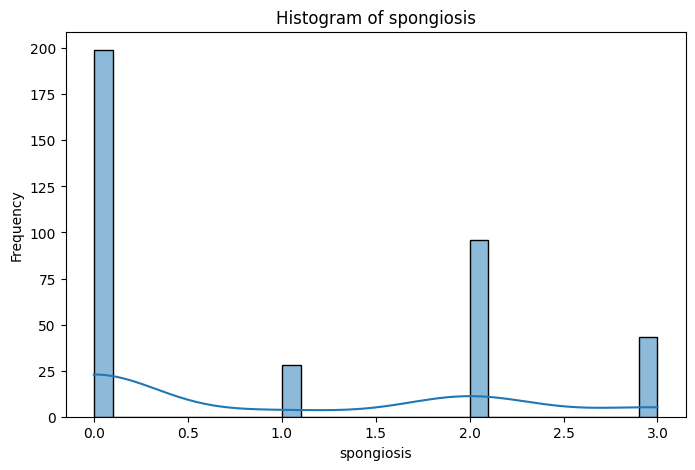

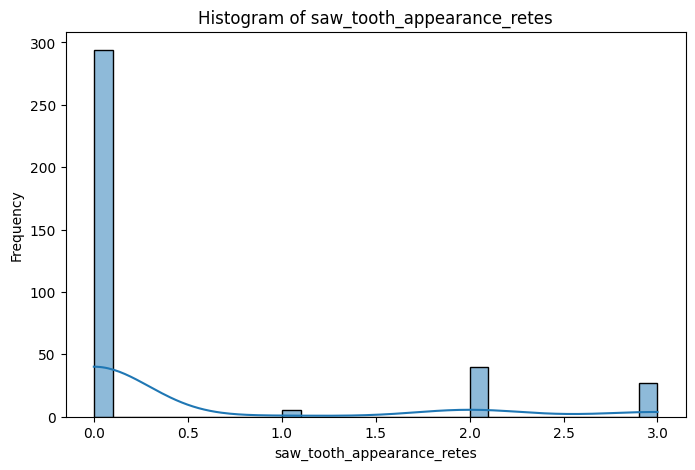

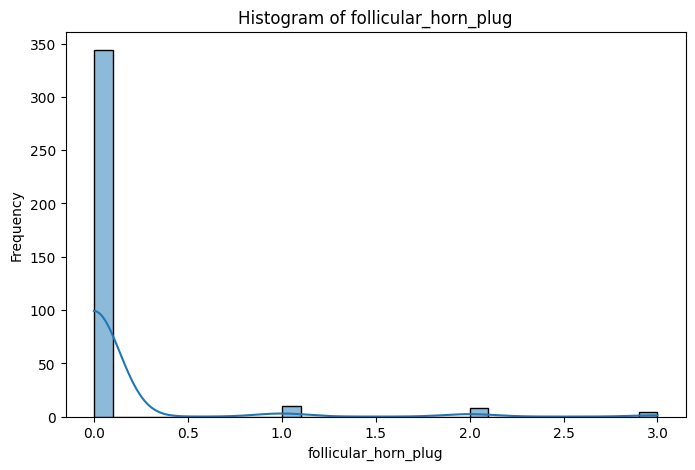

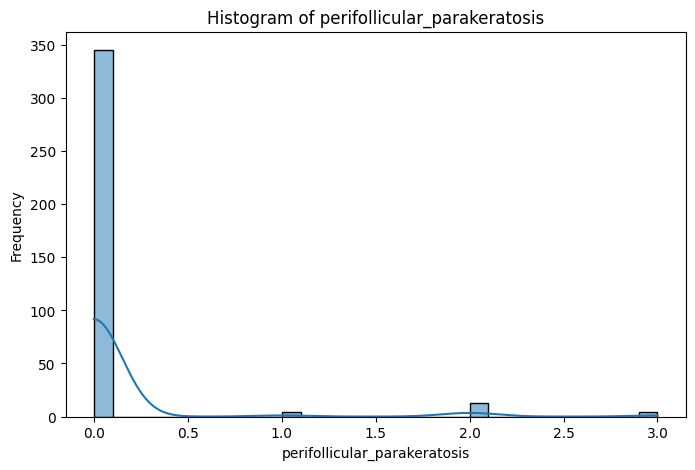

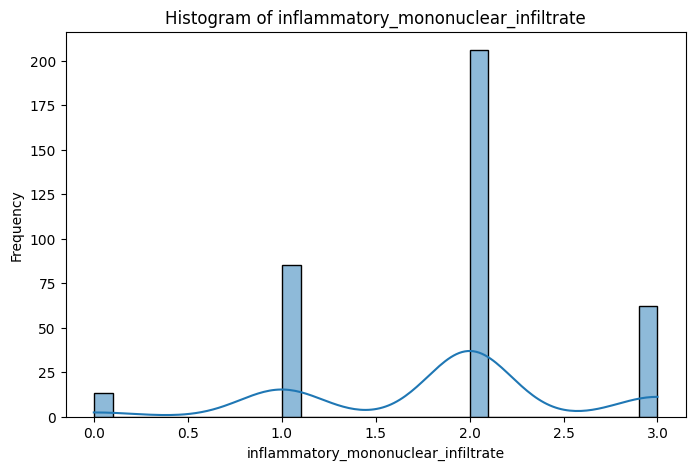

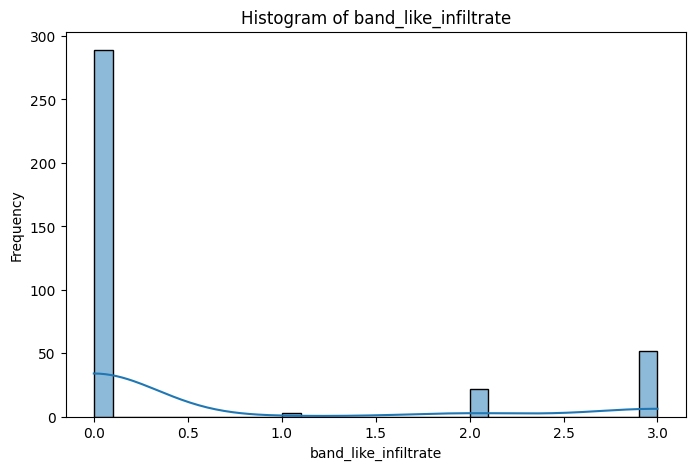

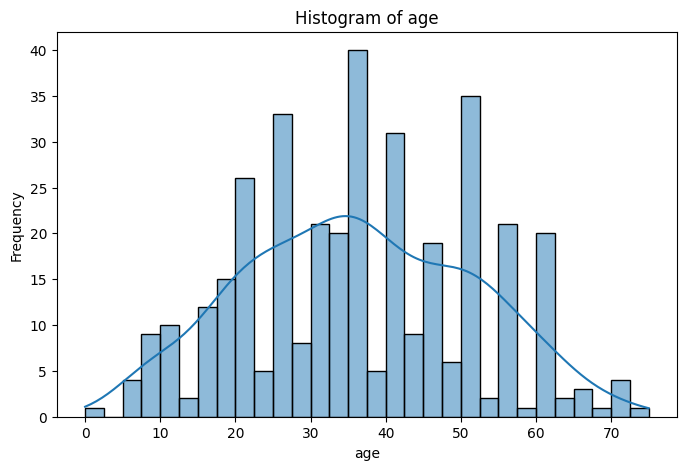

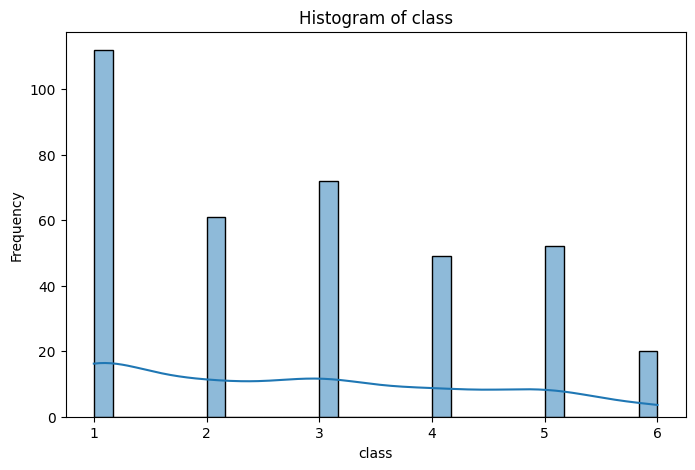

In [4]:
# Q3. Plot Histograms
for column in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()